# Layerwise evaluation on MNIST

## MNIST Dataset Overview

The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

More info: http://yann.lecun.com/exdb/mnist/

In [1]:
import tensorflow as tf
from tensorflow.python.tools import inspect_checkpoint
from tensorflow.python import pywrap_tensorflow

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
def load_variables(file_name):
    reader = pywrap_tensorflow.NewCheckpointReader(file_name)
    var_to_shape_map = reader.get_variable_to_shape_map()
    var_values = dict()
    for key in sorted(var_to_shape_map):
        print("tensor_name: ", key)
#         print(reader.get_tensor(key))
        var_values.update({key: reader.get_tensor(key)})
    return var_values

In [5]:
# set checkpoint path

ckpt_path = '/media/oanaucs/Data/awp_trained_models/mnist_prune_0.01/model.ckpt-22821'

In [6]:
variables = load_variables(ckpt_path)

tensor_name:  conv1/biases
tensor_name:  conv1/weights
tensor_name:  conv2/biases
tensor_name:  conv2/weights
tensor_name:  fc3/biases
tensor_name:  fc3/weights
tensor_name:  logits/biases
tensor_name:  logits/weights


In [7]:
tensors_to_inspect = ['conv1/weights',  'conv2/weights', 'fc3/weights']

In [8]:
subplots_dir = './../eval_results/mnist/plots'
subplots_prefix = 'init_layers_hist'
subplots_postfix = '.png'

In [ ]:
# f,a = plt.subplots(1,3, figsize=(15,5))
# a = a.ravel()

# for idx,ax in enumerate(a):
#     ax.hist(np.asarray(variables[tensors_to_inspect[idx]]).flatten())
#     ax.set_title(tensors_to_inspect[idx])
# plt.tight_layout()

# plt.savefig(subplots_dir + subplots_prefix + subplots_postfix)

In [ ]:
threshold = 0.05
subplots_threshold_filename = subplots_dir + subplots_prefix + 'num_' + str(threshold) + subplots_postfix

In [ ]:
# f,a = plt.subplots(1,3, figsize=(15,5))
# a = a.ravel()

# for idx,ax in enumerate(a):
#     weights = np.asarray(variables[tensors_to_inspect[idx]]).flatten()
# #     threshold_idx = int(threshold * weights.size)
# #     threshold_val = np.abs(weights[threshold_idx])
#     threshold_val = threshold
#     n, _, _ = ax.hist(weights)
#     ax.plot([threshold_val, threshold_val], [0, np.max(n)], linestyle='-', color='orange')
#     ax.plot([-threshold_val, -threshold_val], [0, np.max(n)], linestyle='-', color='orange')
#     ax.set_title(tensors_to_inspect[idx])
# plt.tight_layout()

# plt.savefig(subplots_threshold_filename)

In [35]:
sparse_ckpt_path = '/media/oanaucs/Data/awp_trained_models/mnist_sparsity/0.5_pruned_model.ckpt-25321'

In [36]:
sparse_variables = load_variables(sparse_ckpt_path)

tensor_name:  conv1/biases
tensor_name:  conv1/weights
tensor_name:  conv2/biases
tensor_name:  conv2/weights
tensor_name:  fc3/biases
tensor_name:  fc3/weights
tensor_name:  logits/biases
tensor_name:  logits/weights


Text(0.5, 1.0, 'conv1/weights')

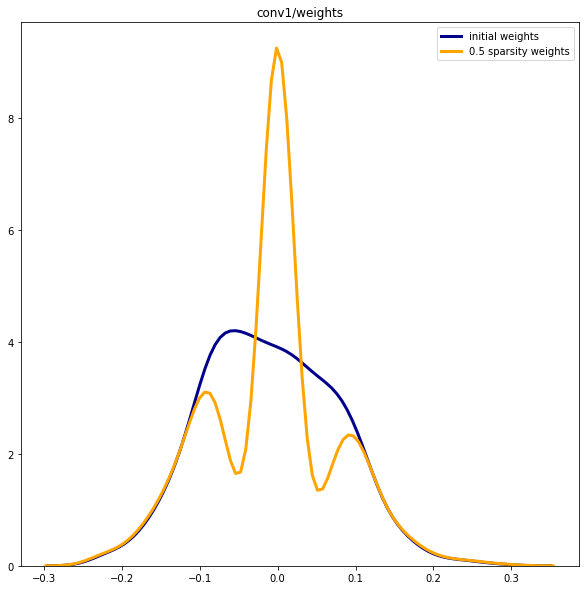

In [39]:
plt.figure(figsize=(10,10))
idx = 0
weights = np.asarray(variables[tensors_to_inspect[idx]]).flatten()
sparse_weights = np.asarray(sparse_variables[tensors_to_inspect[idx]]).flatten()
sns.distplot(weights, hist=False, kde_kws={"color": "darkblue", "lw": 3, "label": "initial weights"},)
sns.distplot(sparse_weights, hist=False, kde_kws={"color": "orange", "lw": 3, "label": "0.5 sparsity weights"},)
plt.title(tensors_to_inspect[idx])